# Prepare Exercises

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Data Acquisition**

In [2]:
df = pd.read_csv('sales_stores_items.csv')

In [3]:
df.shape

(913000, 15)

In [4]:
#Drop the extra column in the datafrmae
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


## 1. Convert date column to datetime format.

In [6]:
# Set the sale_date to datetime object
df.sale_date = pd.to_datetime(df.sale_date)

## 2. Plot the distribution of sale_amount and item_price.

In [ ]:
#Sale amount dist
df['sale_amount'].plot.hist()

In [ ]:
#item_price dist
df['item_price'].plot.hist()

## 3. Set the index to be the datetime variable.

In [7]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [8]:
df.tail()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,34,21.0,619014,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066
2017-12-31 00:00:00+00:00,33,100.0,598928,8,15000 San Pedro Ave,San Antonio,TX,78232,The First Years,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078
2017-12-31 00:00:00+00:00,50,82.0,913000,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


## 4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
#Create a column for month
df['month'] = df.index.month_name()

#Create a column for day of the week
df['day_of_week'] = df.index.day_name()

## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [12]:
def get_sales_total(df):
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df

df = get_sales_total(df)

In [13]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

---

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [14]:
def get_open_power_data():
    '''
    This function reads in data for electrcity consumption, wind power 
    production, and solar power production for 2006 - 2017 in Germany
    and returns the data in a single dataframe named df
    '''
    base_url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
    df = pd.read_csv(base_url)
    
    return df

In [15]:
df = get_open_power_data()

In [17]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
df.to_csv('opsd_germany_daily.csv')

In [20]:
df = pd.read_csv('opsd_germany_daily.csv')

In [21]:
df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


## 1.Convert date column to datetime format.

In [22]:
# Set the sale_date to datetime object
df.Date = pd.to_datetime(df.Date)

## 2. Plot the distribution of each of your variables.

In [23]:
df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [24]:
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [25]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


<AxesSubplot:>

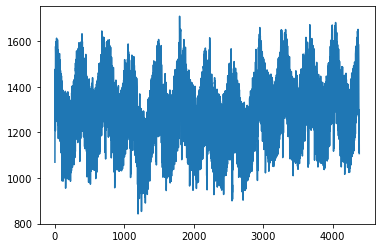

In [26]:
df.Consumption.plot()

In [48]:
df.Wind.plot()

TypeError: no numeric data to plot

<AxesSubplot:>

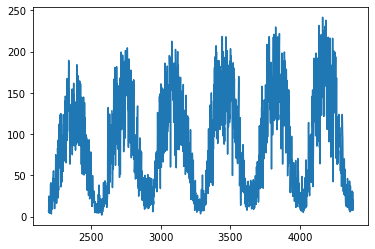

In [28]:
df.Solar.plot()

<AxesSubplot:>

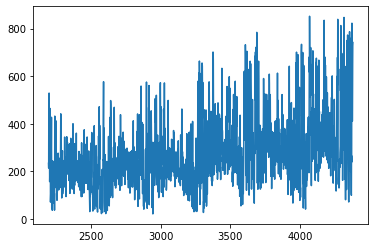

In [30]:
df['Wind+Solar'].plot()

## 3. Set the index to be the datetime variable.

In [31]:
# Sort rows by the date and then set the index as that date
df = df.set_index("Date").sort_index()

In [35]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


## 4. Add a month and a year column to your dataframe.

In [36]:
#Create a column for month
df['month'] = df.index.month_name()

In [39]:
#Create a column for year
df['year'] = df.index.year

In [40]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


## 5. Fill any missing values.

In [43]:
df = df.fillna('0')

In [44]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0,0,0,January,2006
2006-01-02,1380.521,0,0,0,January,2006
2006-01-03,1442.533,0,0,0,January,2006
2006-01-04,1457.217,0,0,0,January,2006
2006-01-05,1477.131,0,0,0,January,2006


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.